In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"D:\Information Technology\IMDB 100+ years data\imdb_100+_years_dataset.csv")
print(df.head())

          id                            title  year duration MPA  rating  \
0  tt0073195                             Jaws  1975    2h 4m  PG     8.1   
1  tt0073629    The Rocky Horror Picture Show  1975   1h 40m   R     7.4   
2  tt0073486  One Flew Over the Cuckoo's Nest  1975   2h 13m   R     8.7   
3  tt0072890                Dog Day Afternoon  1975    2h 5m   R     8.0   
4  tt0073692                          Shampoo  1975   1h 50m   R     6.4   

  votes  meta_score                                        description  \
0  690K        87.0  When a massive killer shark unleashes chaos on...   
1  174K        65.0  A newly-engaged couple have a breakdown in an ...   
2  1.1M        84.0  In the Fall of 1963, a Korean War veteran and ...   
3  281K        86.0  Three amateur robbers plan to hold up a Brookl...   
4   15K        65.0  On Election Day, 1968, irresponsible hairdress...   

                             Movie_Link  ... opening_weekend_gross  \
0  https://www.imdb.com/titl

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63249 entries, 0 to 63248
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     63249 non-null  object 
 1   title                  63249 non-null  object 
 2   year                   63249 non-null  int64  
 3   duration               61174 non-null  object 
 4   MPA                    41227 non-null  object 
 5   rating                 59181 non-null  float64
 6   votes                  59181 non-null  object 
 7   meta_score             15533 non-null  float64
 8   description            60889 non-null  object 
 9   Movie_Link             63249 non-null  object 
 10  writers                62980 non-null  object 
 11  directors              63198 non-null  object 
 12  stars                  62905 non-null  object 
 13  budget                 15359 non-null  object 
 14  opening_weekend_gross  16837 non-null  object 
 15  gr

In [149]:
df.columns

Index(['id', 'title', 'year', 'duration', 'MPA', 'rating', 'votes',
       'meta_score', 'description', 'Movie_Link', 'writers', 'directors',
       'stars', 'budget', 'opening_weekend_gross', 'gross_worldwide',
       'gross_us_canada', 'release_date', 'countries_origin',
       'filming_locations', 'production_companies', 'awards_content', 'genres',
       'languages'],
      dtype='object')

In [150]:
df.isnull().sum()

id                           0
title                        0
year                         0
duration                  2075
MPA                      22022
rating                    4068
votes                     4068
meta_score               47716
description               2360
Movie_Link                   0
writers                    269
directors                   51
stars                      344
budget                   47890
opening_weekend_gross    46412
gross_worldwide          42527
gross_us_canada          43705
release_date              8400
countries_origin            99
filming_locations        16854
production_companies      1973
awards_content           36181
genres                     787
languages                  330
dtype: int64

In [151]:
# Drop highly missing or irrelevant columns (example)
df.drop(columns=['Movie_Link', 'awards_content'], inplace=True)

In [152]:
# Example fill for numerical columns
df['rating'] = df['rating'].fillna(df['rating'].median())
df['votes'] = df['votes'].fillna(0)

In [153]:
# Example fill for categorical
df['MPA'] = df['MPA'].fillna("Not Rated")

In [154]:
df.isnull().sum()

id                           0
title                        0
year                         0
duration                  2075
MPA                          0
rating                       0
votes                        0
meta_score               47716
description               2360
writers                    269
directors                   51
stars                      344
budget                   47890
opening_weekend_gross    46412
gross_worldwide          42527
gross_us_canada          43705
release_date              8400
countries_origin            99
filming_locations        16854
production_companies      1973
genres                     787
languages                  330
dtype: int64

In [158]:
# Drop rows with missing genres
df.dropna(subset=['genres'], inplace=True)

In [163]:
import re

# Custom parser function
def parse_duration(x):
    if pd.isna(x):
        return np.nan
    x = str(x).strip().lower()
    
    # Match patterns like '2h 10m', '1h', '45m'
    match = re.match(r'(?:(\d+)\s*h)?\s*(?:(\d+)\s*m)?', x)
    if not match:
        return np.nan

    hours = int(match.group(1)) if match.group(1) else 0
    minutes = int(match.group(2)) if match.group(2) else 0
    return hours * 60 + minutes

# Apply conversion
df['duration'] = df['duration'].apply(parse_duration)

In [165]:
df['duration'].describe()
df['duration'].isnull().sum()
df['duration'].dtype

dtype('float64')

In [167]:
df['duration'].isnull().sum()

1614

In [168]:
df['duration'].describe()

count    60848.000000
mean        95.724494
std         36.475582
min          0.000000
25%         82.000000
50%         93.000000
75%        105.000000
max       5220.000000
Name: duration, dtype: float64

In [169]:
# Simple imputation
df['duration'] = df['duration'].fillna(df['duration'].median())

In [175]:
df['duration'].isnull().sum()

0

In [177]:
df.isnull().sum()

id                           0
title                        0
year                         0
duration                     0
MPA                          0
rating                       0
votes                        0
meta_score               46929
description               1888
writers                    214
directors                   25
stars                      297
budget                   47108
opening_weekend_gross    45655
gross_worldwide          41781
gross_us_canada          42957
release_date              8365
countries_origin            72
filming_locations        16184
production_companies      1845
genres                       0
languages                  283
dtype: int64

In [179]:
df[df['meta_score'].notnull()]['meta_score'].describe()

count    15533.000000
mean        59.071203
std         17.403032
min          1.000000
25%         47.000000
50%         61.000000
75%         72.000000
max        100.000000
Name: meta_score, dtype: float64

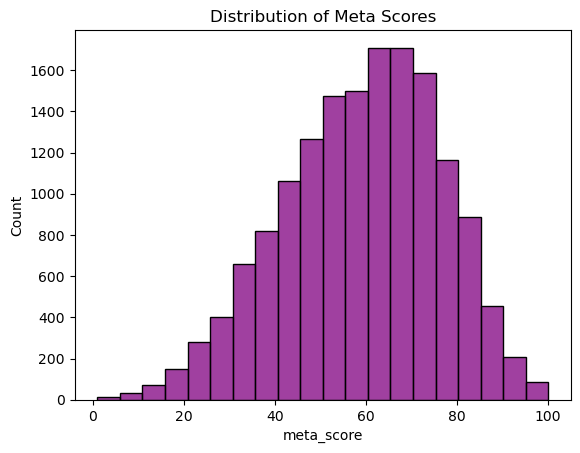

In [181]:
sns.histplot(df['meta_score'].dropna(), bins=20, color='purple')
plt.title("Distribution of Meta Scores")
plt.show()

In [183]:
df['budget'].head()

0    $7,000,000 (estimated)
1    $1,200,000 (estimated)
2    $3,000,000 (estimated)
3    $1,800,000 (estimated)
4    $4,000,000 (estimated)
Name: budget, dtype: object

In [190]:
df.drop(columns=['budget'], inplace=True)

In [192]:
df.columns

Index(['id', 'title', 'year', 'duration', 'MPA', 'rating', 'votes',
       'meta_score', 'description', 'writers', 'directors', 'stars',
       'opening_weekend_gross', 'gross_worldwide', 'gross_us_canada',
       'release_date', 'countries_origin', 'filming_locations',
       'production_companies', 'genres', 'languages'],
      dtype='object')

In [198]:
df['gross_us_canada'].head(20)

0     $267,263,625
1     $112,892,319
2     $108,981,275
3      $50,000,000
4      $49,407,734
5      $41,833,347
6      $39,000,000
7      $36,853,000
8      $34,251,525
9      $27,476,252
10     $24,441,725
11     $20,642,922
12     $20,123,742
13     $20,000,000
14     $15,700,729
15     $14,200,000
16     $12,484,444
17     $11,234,220
18     $11,000,000
19      $9,984,123
Name: gross_us_canada, dtype: object

In [200]:
df['stars'].head(20) # objective column

0     ['Roy Scheider', 'Robert Shaw', 'Richard Dreyf...
1     ['Tim Curry', 'Susan Sarandon', 'Barry Bostwic...
2     ['Jack Nicholson', 'Louise Fletcher', 'Michael...
3     ['Al Pacino', 'John Cazale', 'Penelope Allen',...
4     ['Warren Beatty', 'Julie Christie', 'Goldie Ha...
5     ['Peter Sellers', 'Christopher Plummer', 'Cath...
6     ['Barbra Streisand', 'James Caan', 'Omar Shari...
7     ['Bill Bixby', 'Susan Clark', 'Don Knotts', 'T...
8     ['Roger Daltrey', 'Ann-Margret', 'Oliver Reed'...
9     ['Robert Redford', 'Faye Dunaway', 'Cliff Robe...
10    ['Gene Hackman', 'Liza Minnelli', 'Burt Reynol...
11    ['Robert Redford', 'Bo Svenson', 'Bo Brundin',...
12    ['Woody Allen', 'Diane Keaton', 'Georges Adet'...
13    ['Eddie Albert', 'Ray Milland', 'Donald Please...
14    ['Kirk Douglas', 'Alexis Smith', 'David Jansse...
15    ['Clint Eastwood', 'George Kennedy', 'Vonetta ...
16    ['Gene Hackman', 'Fernando Rey', 'Bernard Fres...
17    ['Georges Atlas', 'Jacques Balutin', 'Ange

In [206]:
df['languages'].head(20) # again its an objective column, will analyze it letter to know about the language trend

0                          ['English']
1                          ['English']
2                          ['English']
3                          ['English']
4                          ['English']
5                          ['English']
6                          ['English']
7                          ['English']
8                          ['English']
9                ['English', 'French']
10    ['English', 'Spanish', 'French']
11                         ['English']
12                         ['English']
13                         ['English']
14                         ['English']
15               ['English', 'German']
16               ['English', 'French']
17               ['English', 'French']
18                         ['English']
19                         ['English']
Name: languages, dtype: object

In [208]:
df['languages'].info() # checking the language column information

<class 'pandas.core.series.Series'>
Index: 62462 entries, 0 to 63248
Series name: languages
Non-Null Count  Dtype 
--------------  ----- 
62179 non-null  object
dtypes: object(1)
memory usage: 976.0+ KB


In [210]:
df['countries_origin'].info() # It is an objective column

<class 'pandas.core.series.Series'>
Index: 62462 entries, 0 to 63248
Series name: countries_origin
Non-Null Count  Dtype 
--------------  ----- 
62390 non-null  object
dtypes: object(1)
memory usage: 976.0+ KB


In [212]:
df['countries_origin'].isnull().sum() # checking the null values in this column

72

In [214]:
df.columns

Index(['id', 'title', 'year', 'duration', 'MPA', 'rating', 'votes',
       'meta_score', 'description', 'writers', 'directors', 'stars',
       'opening_weekend_gross', 'gross_worldwide', 'gross_us_canada',
       'release_date', 'countries_origin', 'filming_locations',
       'production_companies', 'genres', 'languages'],
      dtype='object')

In [230]:
# Step 1: Filter movies released in 2024
df_2024 = df[df['year'] == 2024]

# Step 2: Drop missing or empty genre entries
# df_2024 = df_2024[df_2024['genres'].notnull() & (df_2024['genres'] != '')]

# Step 3: Split genre strings (like 'Monster Horror, Sea Adventure') into separate entries
all_genres_2024 = df_2024['genres'].str.split(',').explode().str.strip()

# Step 4: Count top 5 genres
top_genres_2024 = all_genres_2024.value_counts().head(10)

# Step 5: Display result
print("Top 10 genres in 2024:")
print(top_genres_2024)


Top 10 genres in 2024:
genres
'Thriller']    184
'Drama'        151
'Comedy'        95
'Action'        83
'Horror'        61
'Adventure'     61
'Drama']        56
'Romance']      51
'Crime'         47
'Animation'     44
Name: count, dtype: int64


In [238]:

### ✅ Fix: Clean those square brackets and quotes before splitting

#Here’s how to fix it:

#  Filter for 2024 movies
df_2024 = df[df['year'] == 2024].copy()

# Remove square brackets and quotes from 'genres'
df_2024['genres'] = df_2024['genres'].str.replace(r"[\[\]\'\"]", '', regex=True)

#  Split the genres and explode into separate rows
all_genres_2024 = df_2024['genres'].str.split(',').explode().str.strip()

#  Get top 5 genres
top_genres_2024 = all_genres_2024.value_counts().head(10)

# Display result
print("Top 20 genres in 2024:")
print(top_genres_2024)


Top 20 genres in 2024:
genres
Drama        274
Thriller     202
Comedy       169
Action       129
Horror        99
Adventure     76
Crime         70
Romance       69
Sci-Fi        59
Mystery       55
Name: count, dtype: int64


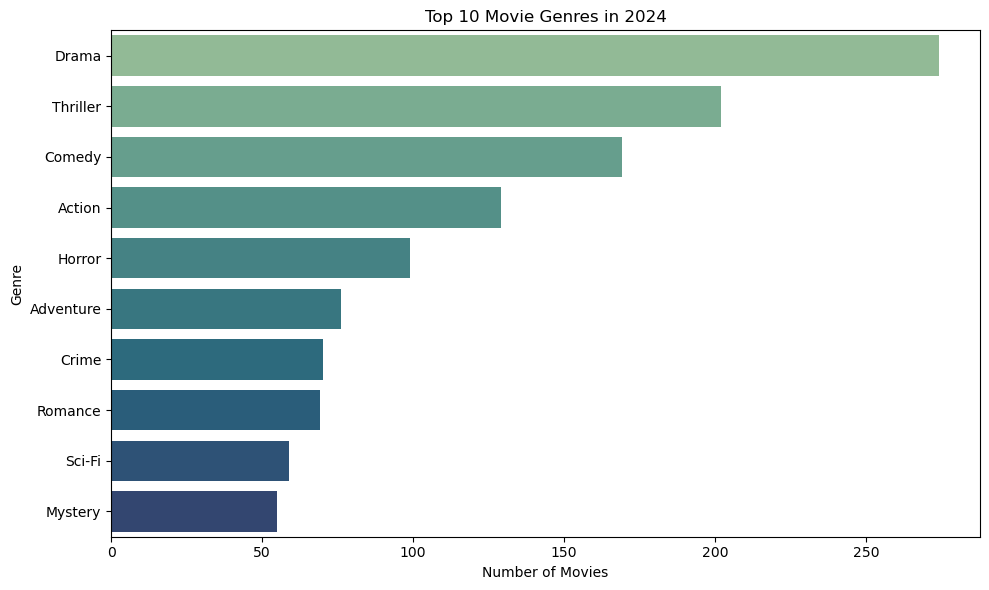

In [246]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare top 10 genres
top_genres_2024 = all_genres_2024.value_counts().head(10).reset_index()
top_genres_2024.columns = ['genre', 'count']

# Plot using hue for color mapping
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_genres_2024,
    x='count',
    y='genre',
    hue='genre',  # assign hue to use palette
    palette='crest',
    dodge=False,  # no grouping
    legend=False  # disable legend if you don't need it
)

plt.title('Top 10 Movie Genres in 2024')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()


In [252]:

# Clean those square brackets and quotes before splitting

#Here’s how to fix it:

# Filter for 2025 movies
df_2025 = df[df['year'] == 2025].copy()

# Remove square brackets and quotes from 'genres'
df_2025['genres'] = df_2025['genres'].str.replace(r"[\[\]\'\"]", '', regex=True)

#  Split the genres and explode into separate rows
all_genres_2025 = df_2025['genres'].str.split(',').explode().str.strip()

# Get top 5 genres
top_genres_2025 = all_genres_2025.value_counts().head(10)

#  Display result
print("Top 10 genres in 2025:")
print(top_genres_2025)

Top 10 genres in 2025:
genres
Drama        242
Thriller     188
Comedy       168
Action       139
Horror       113
Romance       67
Adventure     66
Crime         61
Fantasy       51
Sci-Fi        49
Name: count, dtype: int64


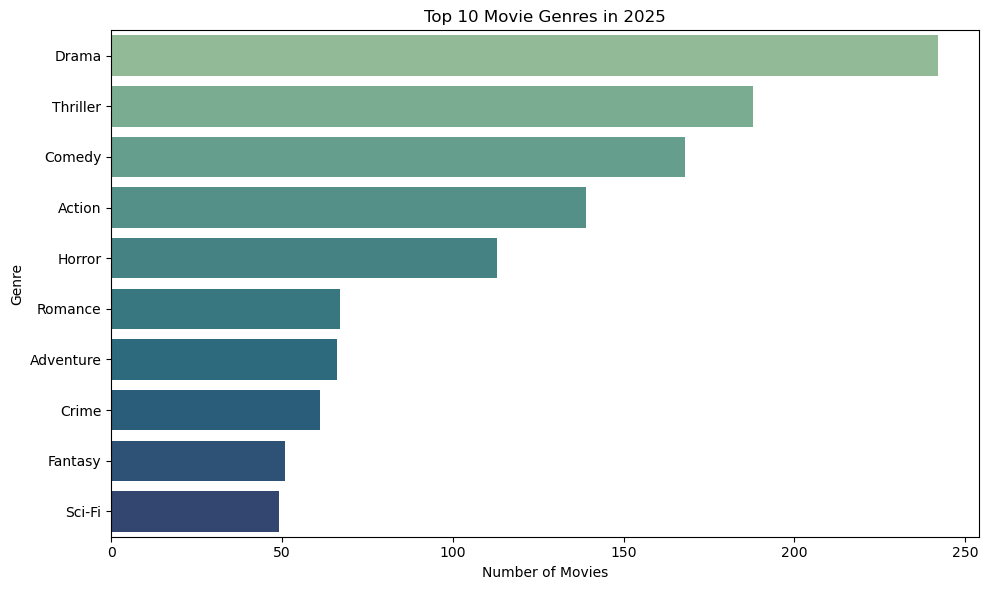

In [254]:
# Prepare top 10 genres
top_genres_2025 = all_genres_2025.value_counts().head(10).reset_index()
top_genres_2025.columns = ['genre', 'count']

# Plot using hue for color mapping
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_genres_2025,
    x='count',
    y='genre',
    hue='genre',  # assign hue to use palette
    palette='crest',
    dodge=False,  # no grouping
    legend=False  # disable legend if you don't need it
)

plt.title('Top 10 Movie Genres in 2025')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

In [260]:

# Clean those square brackets and quotes before splitting

#Here’s how to fix it:

# Filter for 1995 movies
df_1995 = df[df['year'] == 1995].copy()

# Remove square brackets and quotes from 'genres'
df_1995['genres'] = df_1995['genres'].str.replace(r"[\[\]\'\"]", '', regex=True)

#  Split the genres and explode into separate rows
all_genres_1995 = df_1995['genres'].str.split(',').explode().str.strip()

# Get top 5 genres
top_genres_1995 = all_genres_1995.value_counts().head(10)

#  Display result
print("Top 10 genres in 1995:")
print(top_genres_1995)

Top 10 genres in 1995:
genres
Drama        362
Comedy       186
Thriller     165
Romance      144
Action       141
Crime        110
Horror        65
Adventure     57
Sci-Fi        55
Family        46
Name: count, dtype: int64


In [320]:
all_genres_1995.head() # checking after spliting the genres content

20350            Buddy Comedy
20350      Computer Animation
20350    Supernatural Fantasy
20350         Urban Adventure
20350               Adventure
Name: genres, dtype: object

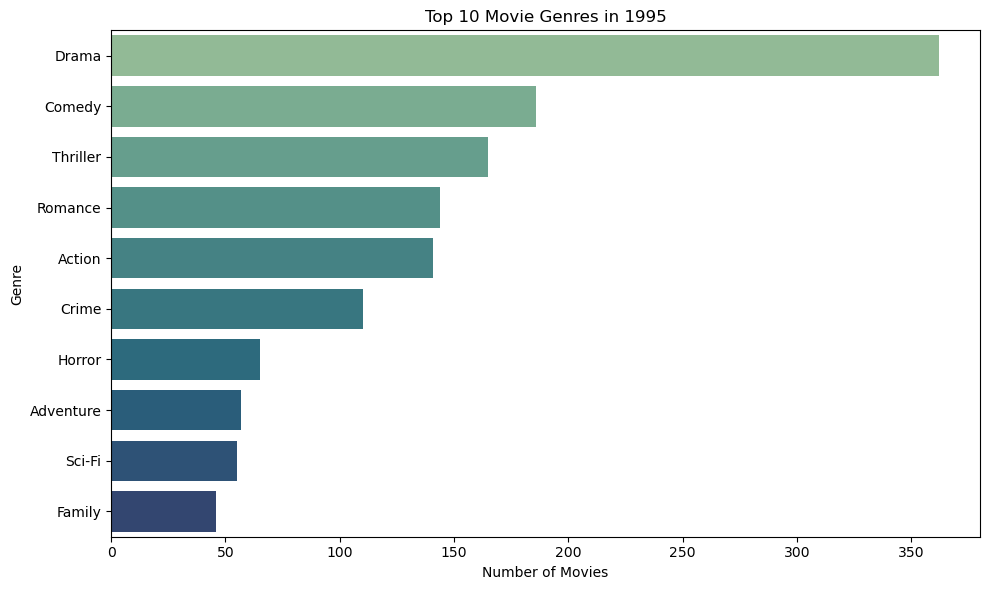

In [262]:
# Prepare top 10 genres in 1995
top_genres_1995 = all_genres_1995.value_counts().head(10).reset_index()
top_genres_1995.columns = ['genre', 'count']

# Plot using hue for color mapping
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_genres_1995,
    x='count',
    y='genre',
    hue='genre',  # assign hue to use palette
    palette='crest',
    dodge=False,  # no grouping
    legend=False  # we can disable legend if we don't need it
)

plt.title('Top 10 Movie Genres in 1995')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

In [322]:
#print(df_1995.head())
df_1995['genres'].head(10)

20350    Buddy Comedy, Computer Animation, Supernatural...
20351        Superhero, Urban Adventure, Action, Adventure
20352                  Survival, Adventure, Drama, History
20353    Hand-Drawn Animation, Period Drama, Pop Musica...
20354    Jungle Adventure, Slapstick, Adventure, Comedy...
20355                     Spy, Action, Adventure, Thriller
20356    Cop Drama, Hard-boiled Detective, Legal Drama,...
20357    Supernatural Fantasy, Teen Fantasy, Comedy, Fa...
20358    High-Concept Comedy, Jungle Adventure, Superna...
20359    Dark Comedy, One-Person Army Action, Urban Adv...
Name: genres, dtype: object

In [266]:
df.columns

Index(['id', 'title', 'year', 'duration', 'MPA', 'rating', 'votes',
       'meta_score', 'description', 'writers', 'directors', 'stars',
       'opening_weekend_gross', 'gross_worldwide', 'gross_us_canada',
       'release_date', 'countries_origin', 'filming_locations',
       'production_companies', 'genres', 'languages'],
      dtype='object')

In [300]:
df['genres'].head(1)

0    ['Monster Horror', 'Sea Adventure', 'Survival'...
Name: genres, dtype: object

In [ ]:
df['description'].isnull().sum()

In [272]:
df['rating'].head()

0    8.1
1    7.4
2    8.7
3    8.0
4    6.4
Name: rating, dtype: float64

In [290]:
# Step 1: Sort by rating (and votes for tie-breaker)
top_20_movies = df.sort_values(by=['rating', 'votes'], ascending=[False, False]).head(20)

# Step 2: Display selected columns
top_20_movies[['title', 'year', 'rating', 'votes']].reset_index(drop=True)

,title,year,rating,votes
0,Prisoners of Fire,2025,10.0,8
1,The College,1943,9.9,65
2,Day by Day: The Dynasty,2023,9.7,11
3,Kachchi Jawani,1987,9.6,7
4,Water Brother,2024,9.6,31
5,Pei Kottu,2025,9.6,304
6,Love Goes Public,2019,9.6,15
7,Twiceland,2018,9.5,77
8,Dexter,2025,9.5,407
9,SEVENTEEN TOUR 'FOLLOW' to JAPAN: LIVE VIEWING,2023,9.5,38


C:\Users\Dell\AppData\Local\Temp\ipykernel_16976\2055986000.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rating', y='title', data=top_20_movies, palette='rocket', order=top_20_movies.sort_values('rating', ascending=False)['title'])


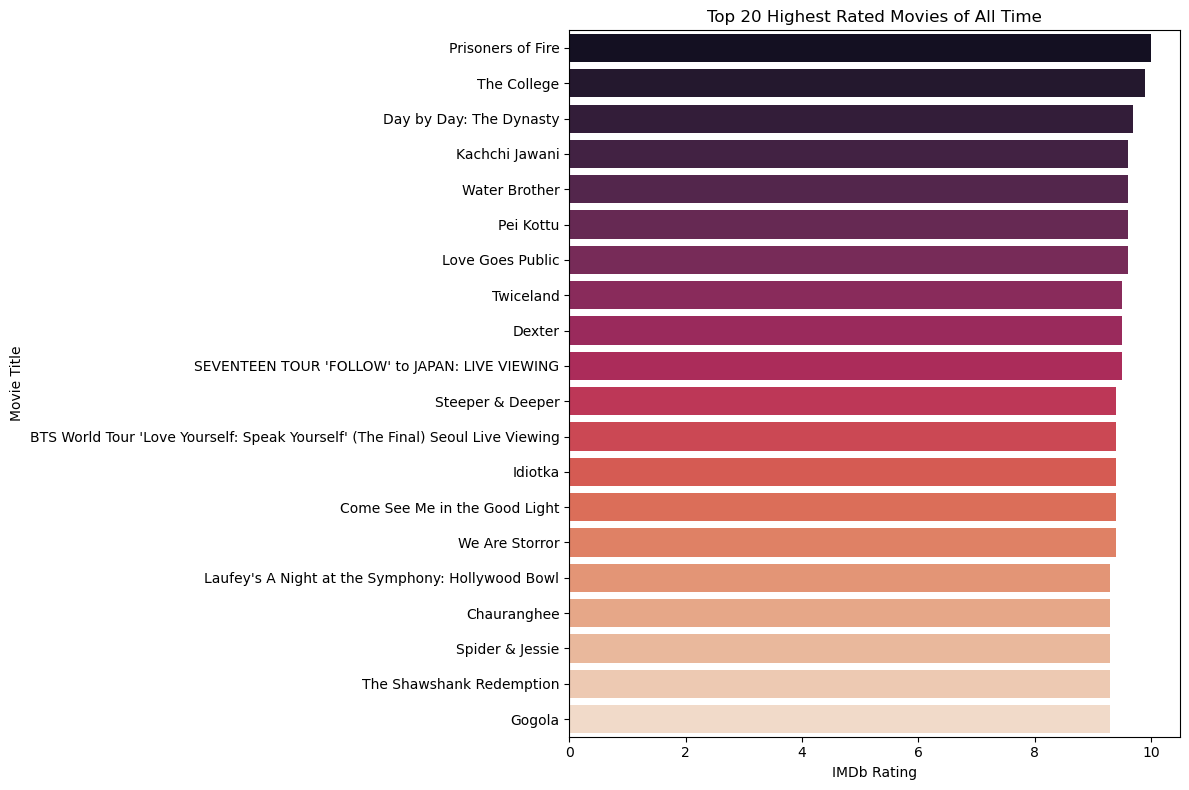

In [292]:
plt.figure(figsize=(12, 8))
sns.barplot(x='rating', y='title', data=top_20_movies, palette='rocket', order=top_20_movies.sort_values('rating', ascending=False)['title'])
plt.title('Top 20 Highest Rated Movies of All Time')
plt.xlabel('IMDb Rating')
plt.ylabel('Movie Title')
plt.tight_layout()
plt.show()

### Calculating Most frequent genre of all time

In [328]:
# Clean brackets and quotes (if needed)
df['genres'] = df['genres'].str.replace(r"[\[\]\'\"]", '', regex=True)

# Step 3: Split genres and explode to individual rows
all_genres = df['genres'].str.split(',').explode().str.strip()

# Step 4: Count genres
genre_counts = all_genres.value_counts()

# Step 5: Display the most common genre
print("Most frequent genre of all time:")
print(genre_counts.head())

Most frequent genre of all time:
genres
Drama       35871
Comedy      19069
Romance     14207
Thriller     9719
Crime        9624
Name: count, dtype: int64


###  Ploting top 10 movie genre in all time

C:\Users\Dell\AppData\Local\Temp\ipykernel_16976\335503295.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.head(10).values, y=genre_counts.head(10).index, palette='viridis')


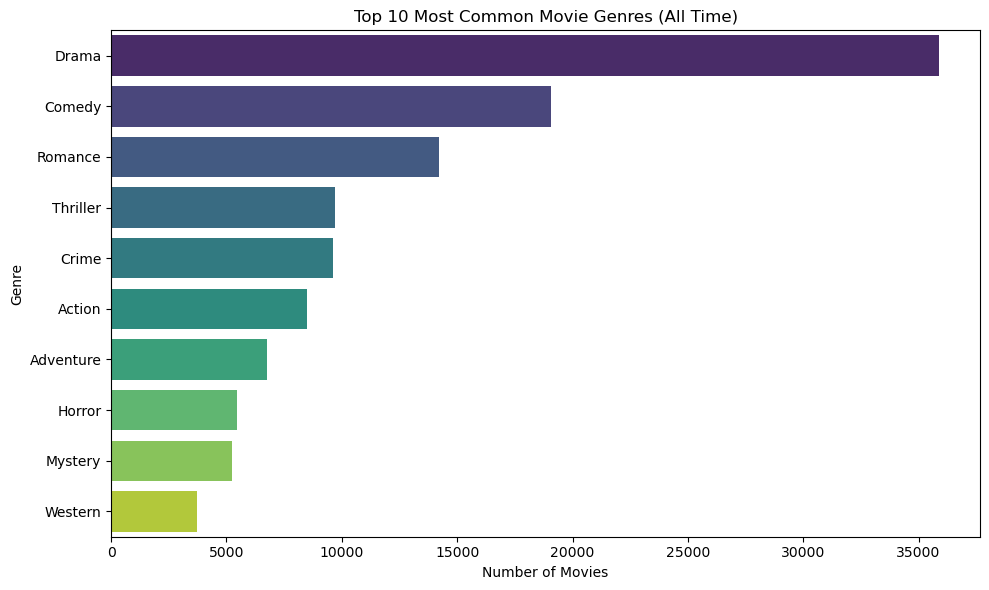

In [330]:
plt.figure(figsize=(10, 6)) # ploting top 10 movie genre in all time
sns.barplot(x=genre_counts.head(10).values, y=genre_counts.head(10).index, palette='viridis')
plt.title('Top 10 Most Common Movie Genres (All Time)')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

In [338]:
df.isnull().sum()

id                           0
title                        0
year                         0
duration                     0
MPA                          0
rating                       0
votes                        0
meta_score               46929
description               1888
writers                    214
directors                   25
stars                      297
opening_weekend_gross    45655
gross_worldwide          41781
gross_us_canada          42957
release_date              8365
countries_origin            72
filming_locations        16184
production_companies      1845
genres                       0
languages                  283
dtype: int64

### ploting wordcloud to know the most frequent language of movie release in all time globaly

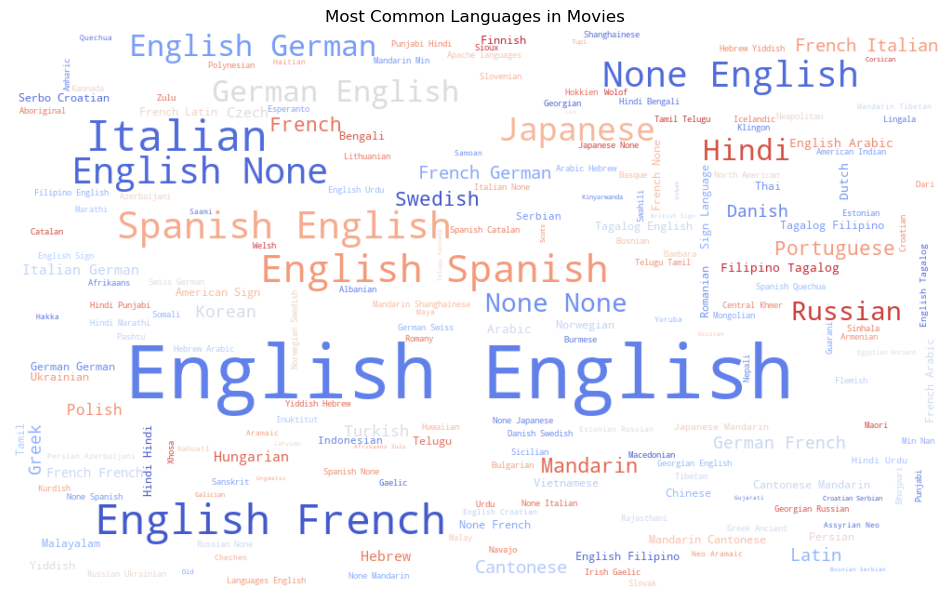

In [344]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Step 1: Drop missing values in 'languages'
language_data = df['languages'].dropna()

# Step 2: Clean brackets and quotes if stored as list-like strings
language_data = language_data.str.replace(r"[\[\]\'\"]", '', regex=True)

# Step 3: Join all languages into one long string
language_text = ' '.join(language_data)

# Step 4: Generate the word cloud
wordcloud = WordCloud(width=1000, height=600, background_color='white', colormap='coolwarm').generate(language_text)

# Step 5: Plot the word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Languages in Movies')
plt.show()

### Ploting wordcloud to know most frequent stars in all time in IMDB

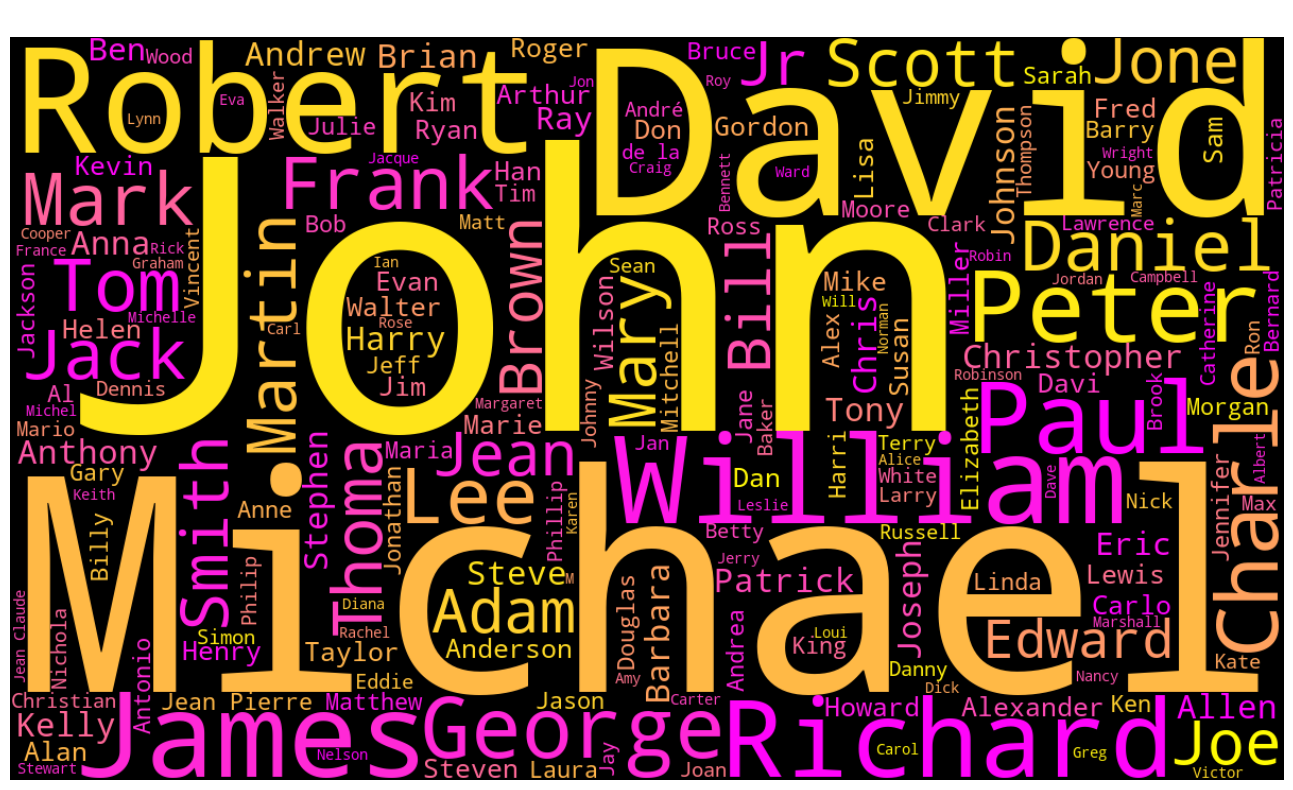

In [347]:
# Step 1: Drop NaN values
stars_data = df['stars'].dropna()

# Step 2: Clean brackets and quotes if necessary
stars_data = stars_data.str.replace(r"[\[\]\'\"]", '', regex=True)

# Step 3: Split multiple stars per movie and join into one long string
all_stars = stars_data.str.split(',').explode().str.strip()
stars_text = ' '.join(all_stars)

# Step 4: Generate the word cloud
star_wordcloud = WordCloud(
    width=1200,
    height=700,
    background_color='black',
    colormap='spring',
    contour_color='white',
    contour_width=1.5,
    max_words=200
).generate(stars_text)

# Step 5: Plot it

plt.figure(figsize=(14, 8))
plt.imshow(star_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Movie Stars', fontsize=18, color='white')
plt.tight_layout()
plt.show()

### Most frequent stars in hindi movie

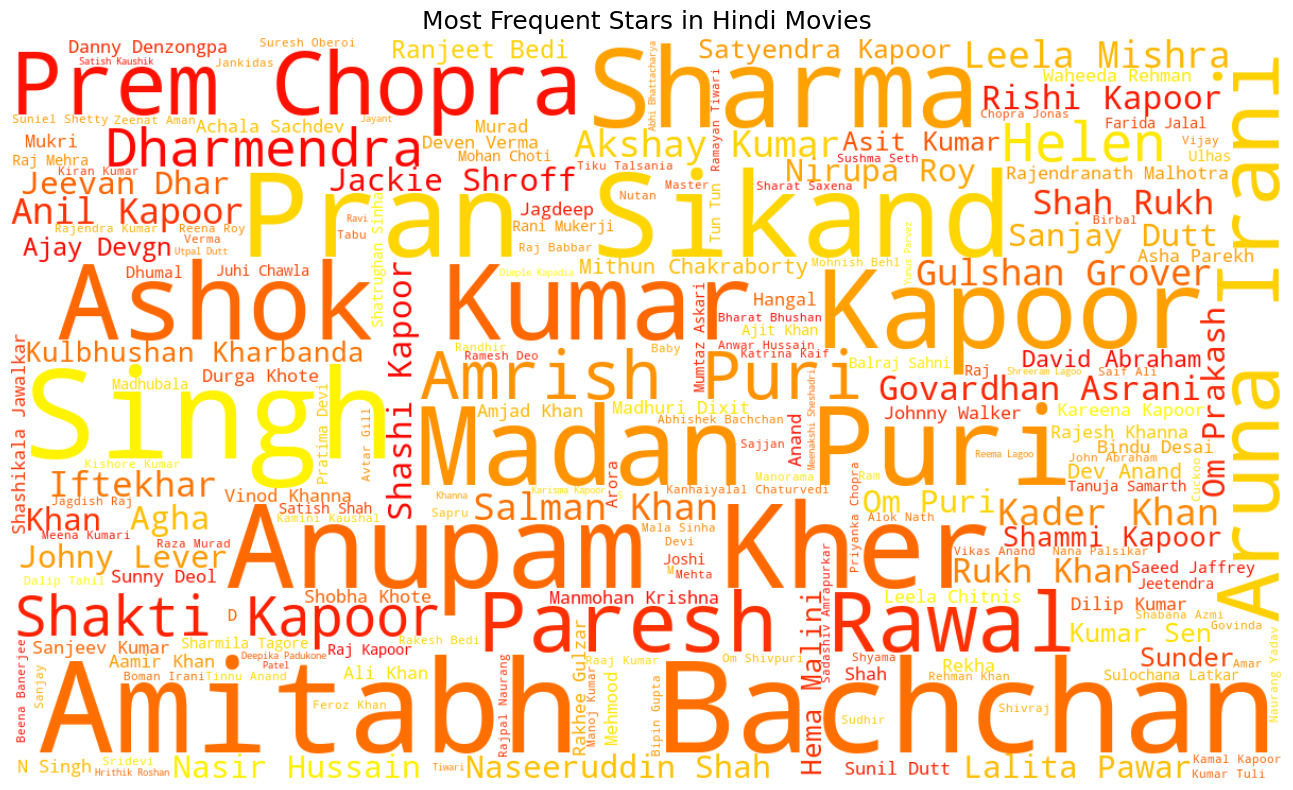

In [356]:
# Filter only rows where 'languages' includes 'Hindi'
df_hindi = df[df['languages'].notna() & df['languages'].str.contains('Hindi', case=False)]

# Drop missing stars
stars_hindi = df_hindi['stars'].dropna()

# Clean the strings (remove brackets, quotes)
stars_hindi = stars_hindi.str.replace(r"[\[\]\'\"]", '', regex=True)

# Split and explode the stars column
all_stars_hindi = stars_hindi.str.split(',').explode().str.strip()

# Join into one big string
stars_text_hindi = ' '.join(all_stars_hindi)

# Generate the word cloud
wordcloud_hindi_stars = WordCloud(
    width=1200,
    height=700,
    background_color='white',
    colormap='autumn',
    contour_color='black',
    contour_width=2,
    max_words=200
).generate(stars_text_hindi)

# Plot
plt.figure(figsize=(14, 8))
plt.imshow(wordcloud_hindi_stars, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Stars in Hindi Movies', fontsize=18)
plt.tight_layout()
plt.show()

### Top 10 stars who worked in hindi movies

In [361]:
# Filter only Hindi language movies
df_hindi = df[df['languages'].notna() & df['languages'].str.contains('Hindi', case=False)]

# Drop missing 'stars' values
stars_hindi = df_hindi['stars'].dropna()

# Clean brackets/quotes
stars_hindi = stars_hindi.str.replace(r"[\[\]\'\"]", '', regex=True)

# Split multiple stars and explode
all_stars = stars_hindi.str.split(',').explode().str.strip()

# Count appearances
top_indian_actors = all_stars.value_counts().head(10)

# Display results
print("Top 10 Highest Working Indian Actors (based on appearance in Hindi movies):")
print(top_indian_actors)

Top 10 Highest Working Indian Actors (based on appearance in Hindi movies):
stars
Amitabh Bachchan    121
Anupam Kher          99
Pran Sikand          99
Madan Puri           87
Dharmendra           85
Ashok Kumar          82
Prem Chopra          81
Aruna Irani          80
Paresh Rawal         77
Amrish Puri          74
Name: count, dtype: int64


C:\Users\Dell\AppData\Local\Temp\ipykernel_16976\1660822121.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_indian_actors.values, y=top_indian_actors.index, palette='Set2')


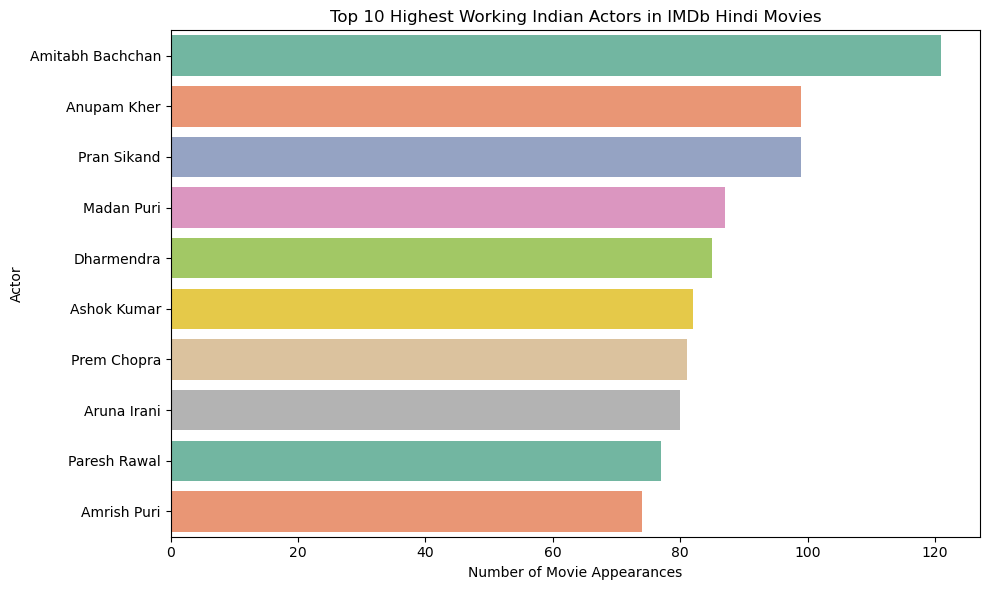

In [363]:
plt.figure(figsize=(10,6))
sns.barplot(x=top_indian_actors.values, y=top_indian_actors.index, palette='Set2')
plt.title('Top 10 Highest Working Indian Actors in IMDb Hindi Movies')
plt.xlabel('Number of Movie Appearances')
plt.ylabel('Actor')
plt.tight_layout()
plt.show()

### Lets find all the movies where Amitabh Bachchan is listed as a star and view their ratings

In [377]:
# Filter rows where 'stars' is not null and includes 'Amitabh Bachchan'
amitabh_movies = df[df['stars'].notna() & df['stars'].str.contains('Amitabh Bachchan', case=False, na=False)]

# Select relevant columns: title, year, rating
amitabh_movie_ratings = amitabh_movies[['title', 'year', 'rating']].sort_values(by='rating', ascending=False)

# Display the result
print("Amitabh Bachchan Movie Ratings:")
print(amitabh_movie_ratings)

Amitabh Bachchan Movie Ratings:
                     title  year  rating
375          Chupke Chupke  1975     8.3
72                  Sholay  1975     8.1
62247                Anand  1971     8.1
24184                Black  2005     8.1
216                Deewaar  1975     8.0
...                    ...   ...     ...
9250   Jhoom Barabar Jhoom  2007     3.7
51606   God Tussi Great Ho  2008     3.7
31340   Hindustan Ki Kasam  1999     3.5
31373         Lal Baadshah  1999     3.3
59640            Insaniyat  1994     3.0

[124 rows x 3 columns]


## IMDB reatings for only amitabh bachchan movies

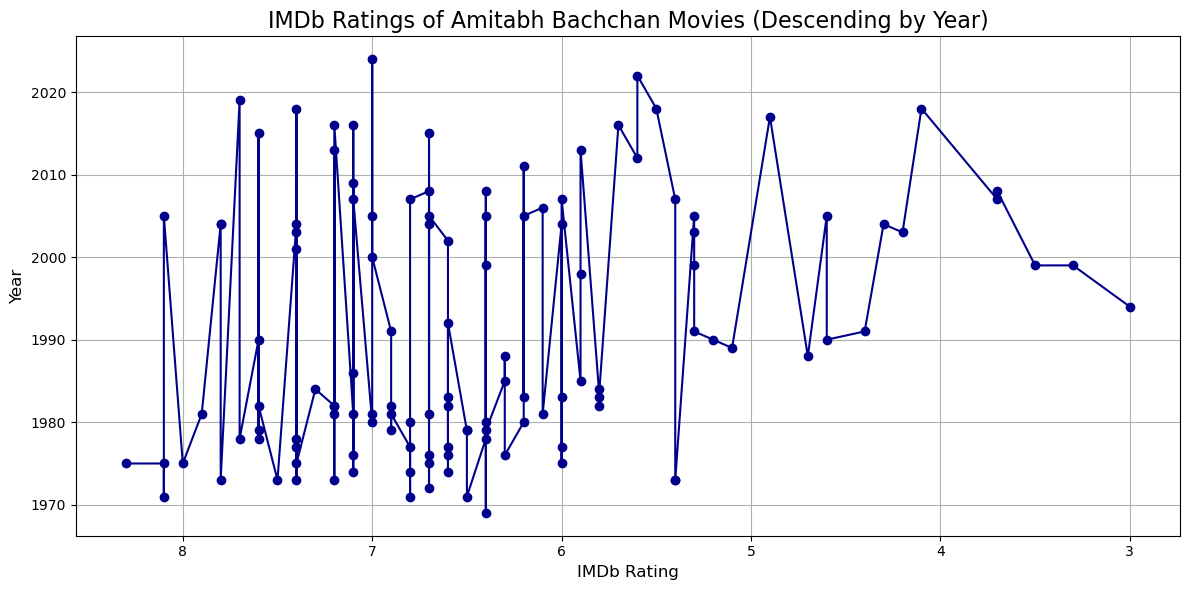

In [385]:
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(amitabh_movie_ratings['rating'], amitabh_movie_ratings['year'], marker='o', linestyle='-', color='darkblue')

# Titles and labels
plt.title("IMDb Ratings of Amitabh Bachchan Movies (Descending by Year)", fontsize=16)
plt.xlabel("IMDb Rating", fontsize=12)
plt.ylabel("Year", fontsize=12)
plt.gca().invert_xaxis()  # Optional: Descending year order left to right
plt.grid(True)
plt.tight_layout()
plt.show()


## Here is all the movies of amitabh bachchan which reating fall between 6 to 10

In [397]:
# Filter all Amitabh Bachchan movies with non-null ratings
amitabh_movies = df[df['stars'].notna() & df['stars'].str.contains('Amitabh Bachchan', case=False, na=False)]
amitabh_movies = amitabh_movies[amitabh_movies['rating'].notna()]

# Count total rated movies
total_movies = len(amitabh_movies)

# Filter movies with ratings between 6 and 10
movies_6_to_10 = amitabh_movies[(amitabh_movies['rating'] >= 6) & (amitabh_movies['rating'] <= 10)]
count_6_to_10 = len(movies_6_to_10)

# Show result
print(f"Total Amitabh Bachchan movies with ratings: {total_movies}")
print(f"Movies rated between 6 and 10: {count_6_to_10}")
print(f"Percentage: {count_6_to_10 / total_movies * 100:.2f}%")


Total Amitabh Bachchan movies with ratings: 124
Movies rated between 6 and 10: 92
Percentage: 74.19%


In [402]:
df.columns

Index(['id', 'title', 'year', 'duration', 'MPA', 'rating', 'votes',
       'meta_score', 'description', 'writers', 'directors', 'stars',
       'opening_weekend_gross', 'gross_worldwide', 'gross_us_canada',
       'release_date', 'countries_origin', 'filming_locations',
       'production_companies', 'genres', 'languages'],
      dtype='object')

## Wordcloud for country origin of films

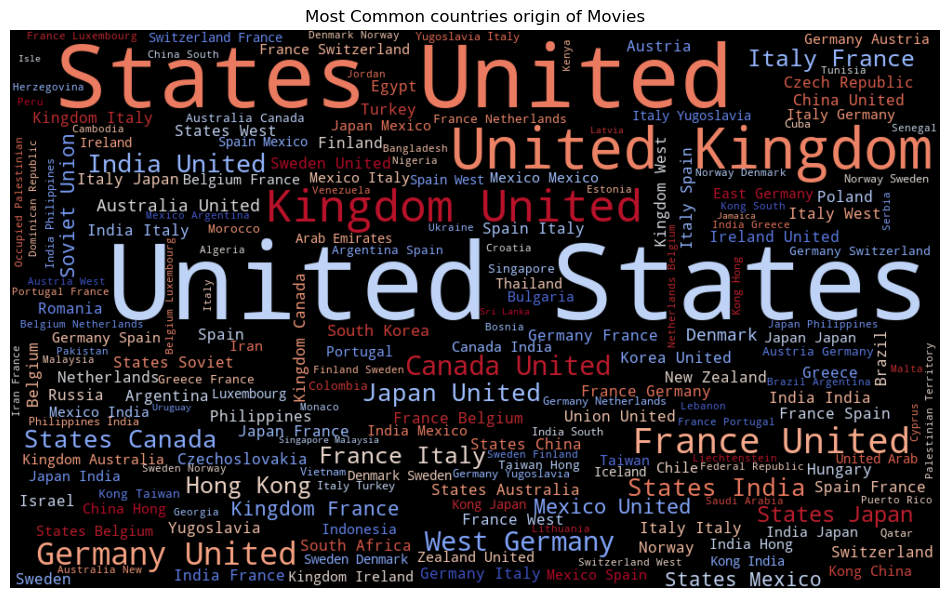

In [406]:
# Drop missing values in 'countries origin'
countries_origin_data = df['countries_origin'].dropna()

# Clean brackets and quotes if stored as list-like strings
countries_origin_data = countries_origin_data.str.replace(r"[\[\]\'\"]", '', regex=True)

# Join all languages into one long string
countries_origin_text = ' '.join(countries_origin_data)

# Generate the word cloud
wordcloud = WordCloud(width=1000, height=600, background_color='black', colormap='coolwarm').generate(countries_origin_text)

# Plot the word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common countries origin of Movies')
plt.show()

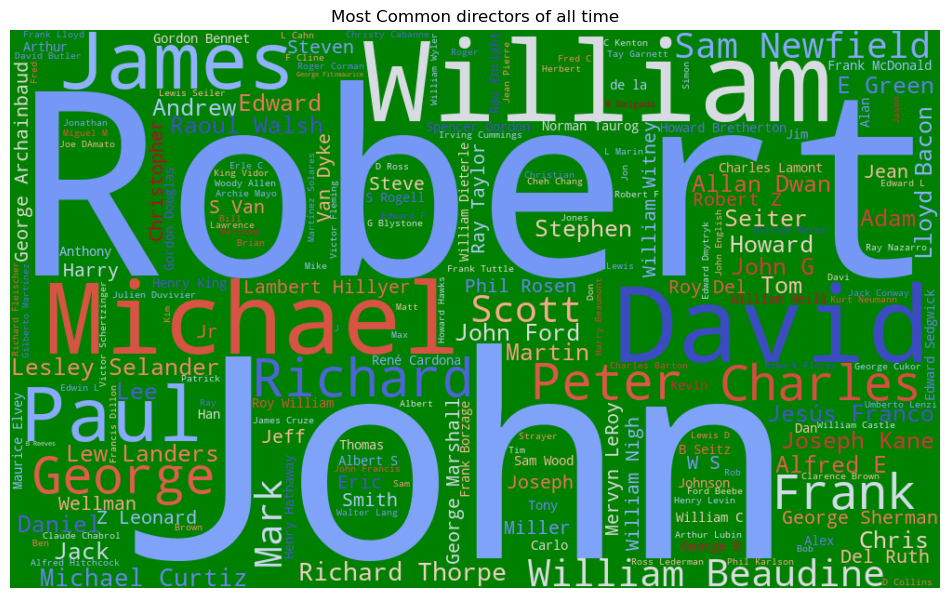

In [411]:
# Drop missing values in 'directors'
directors_data = df['directors'].dropna()

# Clean brackets and quotes if stored as list-like strings
directors_data = directors_data.str.replace(r"[\[\]\'\"]", '', regex=True)

# Join all directors into one long string
directors_text = ' '.join(directors_data)

# Generate the word cloud
wordcloud = WordCloud(width=1000, height=600, background_color='green', colormap='coolwarm').generate(directors_text)

# Plot the word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common directors of all time')
plt.show()

In [433]:
# Drop rows with missing directors
df_directors = df[df['directors'].notna()]

# Split multiple directors per movie, explode them into separate rows
all_directors = df_directors['directors'].str.split(',').explode().str.strip()

# Count occurrences and get top 10
top_10_directors = all_directors.value_counts().head(10)

# Display result
print("Top 10 Directors by Number of Movies:")
print(top_10_directors)


Top 10 Directors by Number of Movies:
directors
['William Beaudine']     137
['Sam Newfield']         123
['Richard Thorpe']       113
['Lesley Selander']      110
['Michael Curtiz']       104
['Joseph Kane']          102
['Lew Landers']           98
['Jesús Franco']          97
['William A. Seiter']     90
['Lloyd Bacon']           89
Name: count, dtype: int64
